# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset

In [ ]:
df = pd.read_csv('/content/mymoviedb.csv', lineterminator='\n')
print(df.head())

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# Preprocess the data

In [ ]:
print("Duplicate Rows: ", df.duplicated().sum())

Duplicate Rows:  0


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = df['Release_Date'].dt.year

In [ ]:
cols_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
def categorize_votes(df, col, labels):
    edges = [df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max()]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df


In [ ]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_votes(df, 'Vote_Average', labels)
print(df['Vote_Average'].value_counts())

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df['Genre'] = df['Genre'].astype('category')

# Data Visualisation

In [ ]:
sns.set_style('whitegrid')

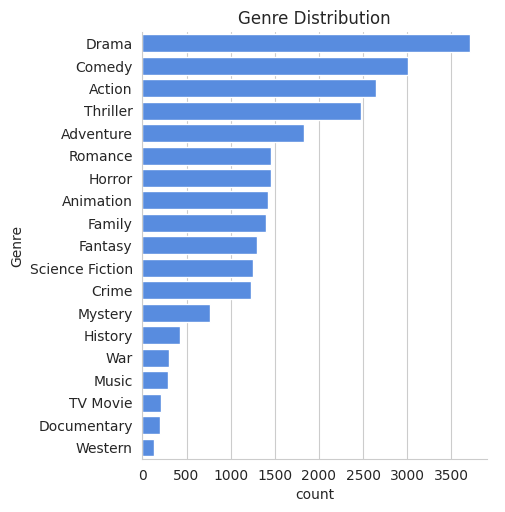

In [ ]:
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='#4287f5')
plt.title('Genre Distribution')
plt.show()

In [ ]:
most_popular_movie = df[df['Popularity'] == df['Popularity'].max()]
print("Most Popular Movie:\n", most_popular_movie[['Title', 'Genre', 'Popularity']])

Most Popular Movie:
                      Title            Genre  Popularity
0  Spider-Man: No Way Home           Action    5083.954
1  Spider-Man: No Way Home        Adventure    5083.954
2  Spider-Man: No Way Home  Science Fiction    5083.954


In [ ]:
least_popular_movie = df[df['Popularity'] == df['Popularity'].min()]
print("Least Popular Movie:\n", least_popular_movie[['Title', 'Genre', 'Popularity']])

Least Popular Movie:
                                       Title            Genre  Popularity
25546  The United States vs. Billie Holiday            Music      13.354
25547  The United States vs. Billie Holiday            Drama      13.354
25548  The United States vs. Billie Holiday          History      13.354
25549                               Threads              War      13.354
25550                               Threads            Drama      13.354
25551                               Threads  Science Fiction      13.354


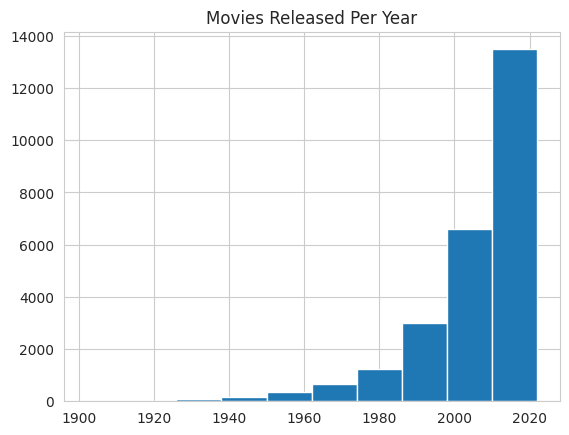

In [ ]:
df['Release_Date'].hist()
plt.title('Movies Released Per Year')
plt.show()
